<a href="https://colab.research.google.com/github/saritmaitra/Market-campaign-analytic-Bank/blob/master/Marketing_Campaign_Retail_Bank_Telemarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [29]:
df = pd.read_csv('bank.csv')
term_deposits = df.copy()
# Have a grasp of data set.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.describe() # summary statistic

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


The mean balance is 1,528.53, but the Standard Deviation (std) is 3,225.41 so we can understand through this that the balance is heavily distributed across the dataset.

### Duration

- The duration is highly correlated in whether a potential client will buy a term deposit. Average Campaign Duration is 371.99, let's see if clients that were above this average were more likely to open a term deposit.So, duraton column need to be dropped; moreover, 
- Duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. 

The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the client will open a term deposit since a higher duration means a higher interest commitment from the bank.



In [6]:
df.info() # checking missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


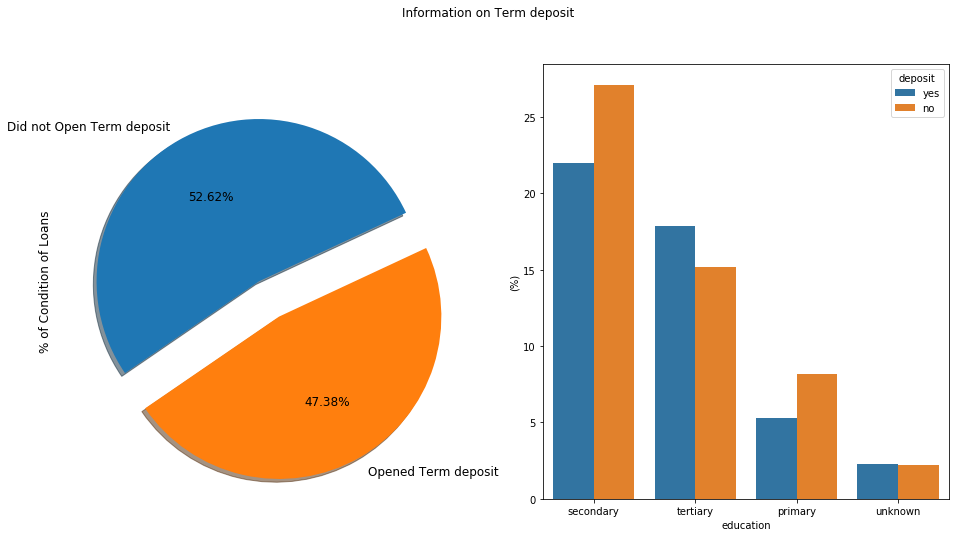

In [12]:
f, ax = plt.subplots(1,2, figsize=(16,8))
#colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term deposit", "Opened Term deposit"
plt.suptitle('Information on Term deposit', fontsize=12)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, 
                                             labels=labels, fontsize=12, startangle=25)

ax[0].set_ylabel('% of Condition of Loans', fontsize=12)

sns.barplot(x="education", y="balance", hue="deposit", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

In [30]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [31]:
df['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

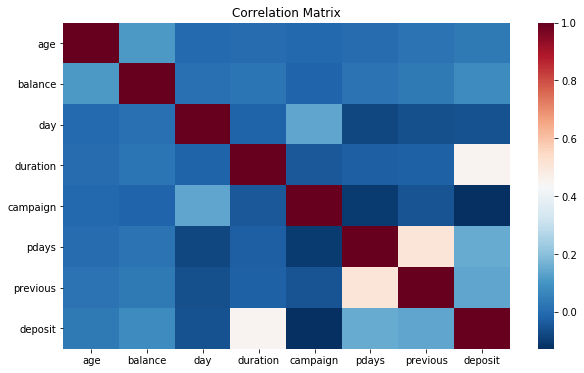

In [15]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(10,6))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])


# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()

sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=12)
plt.show()

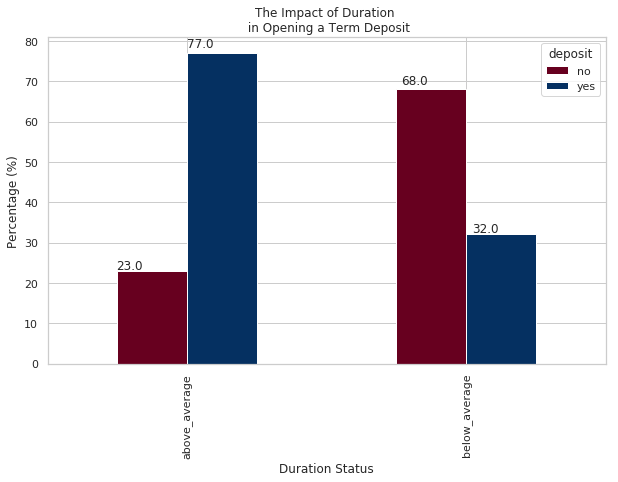

In [23]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=12)
plt.xlabel("Duration Status", fontsize=12);
plt.ylabel("Percentage (%)", fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
plt.show()

### Duration Status 
People who were above the duration status, were more likely to open a term deposit. 77% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.

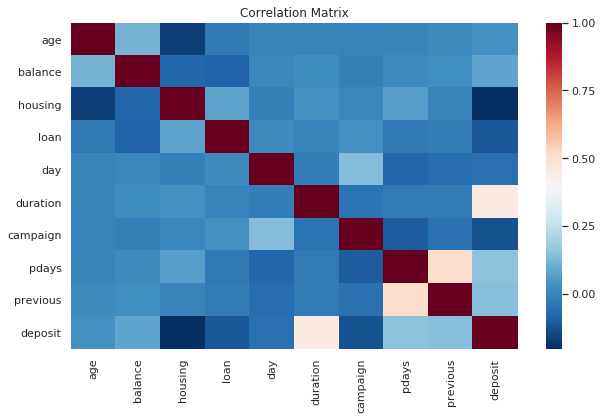

In [51]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(10,6))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])
df['housing'] = LabelEncoder().fit_transform(df['housing'])
df['loan'] = LabelEncoder().fit_transform(df['loan'])


# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()

sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=12)
plt.show()

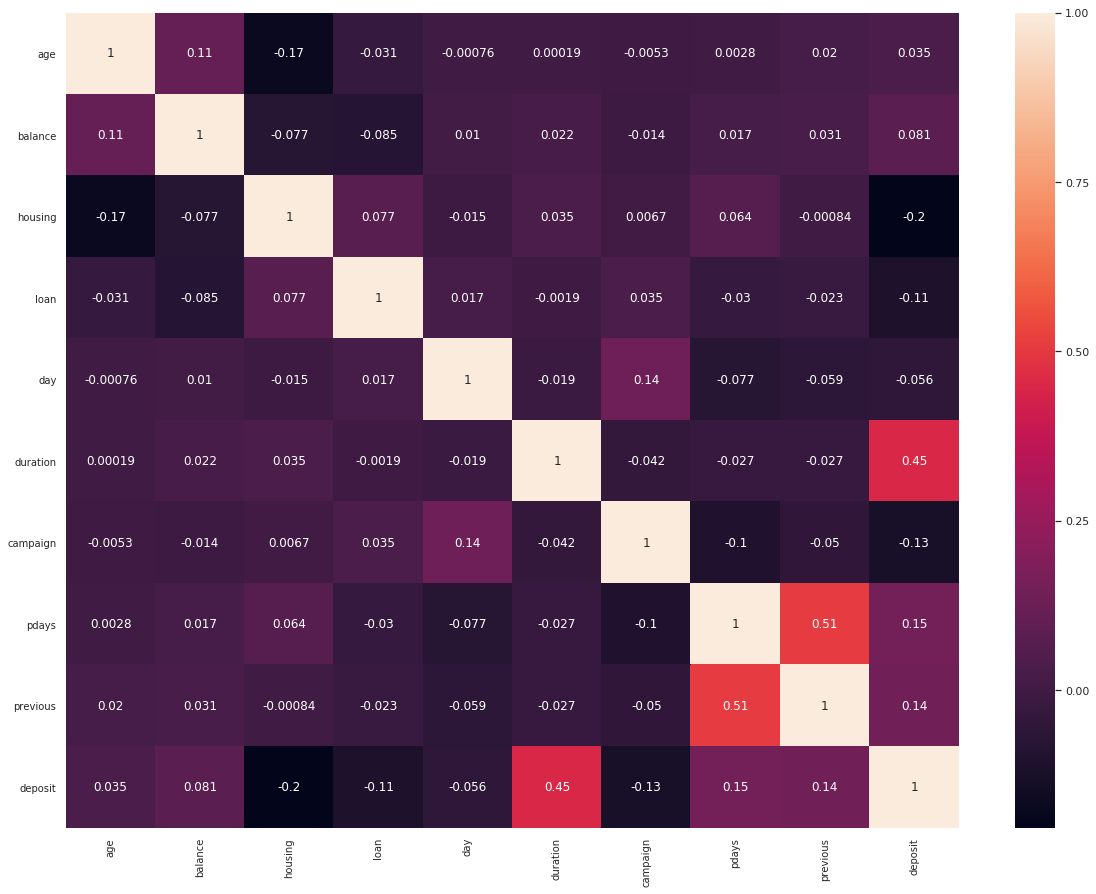

In [52]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

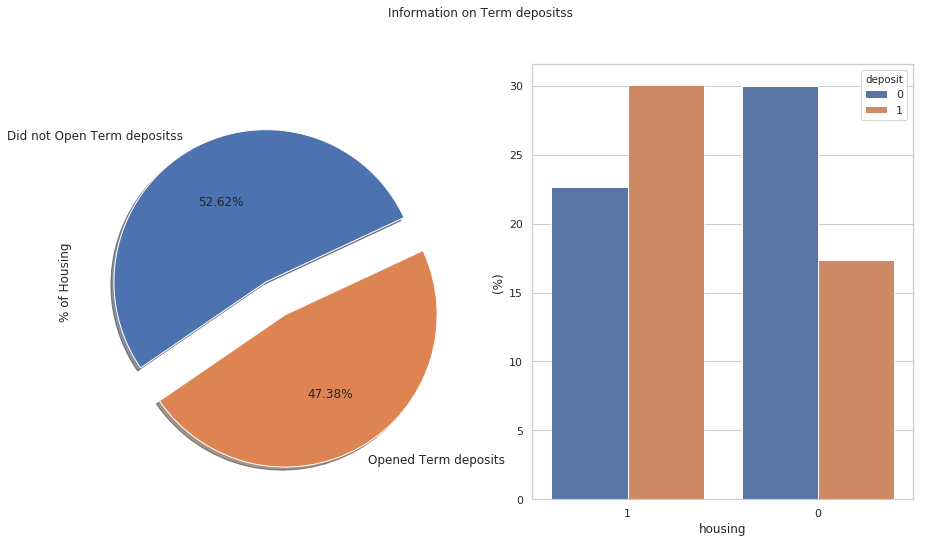

In [49]:
f, ax = plt.subplots(1,2, figsize=(15,8))
labels ="Did not Open Term deposits", "Opened Term deposits"
plt.suptitle('Information on Term deposits', fontsize=12)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, 
                                             labels=labels, fontsize=12, startangle=25)


ax[0].set_ylabel('% of Housing', fontsize=12)

sns.barplot(x="housing", y="balance", hue="deposit", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["deposit"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

In [48]:
dep = term_deposits['deposit']
term_deposits.drop(labels=['deposit'], axis=1,inplace=True)
term_deposits.insert(0, 'deposit', dep)
term_deposits.head()

term_deposits["housing"].value_counts()/len(term_deposits)

no     0.526877
yes    0.473123
Name: housing, dtype: float64

In [53]:
df['loan'].value_counts()

0    9702
1    1460
Name: loan, dtype: int64

### Personal Loans:
Personal loan is an important feature that determines whether a potential client will open a term deposit or not. To confirm it has a heavy weight on the final output you can check the correlation matrix above and you can see it has a -11% correlation with opening a deposit. 

To implement stratified sampling in our train and test data, let's follow the below procedures:
- Check the data distribution. 
- The "loan" column contains 87% (86.9) of "no" (Does not have personal loans) and 13% (13.1) of "yes" (Have personal loans.) 

We want to make sure that our training and test set contains the same ratio of 87% "no" and 13% "yes"." 
### Stratified Sampling 
In order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed. 

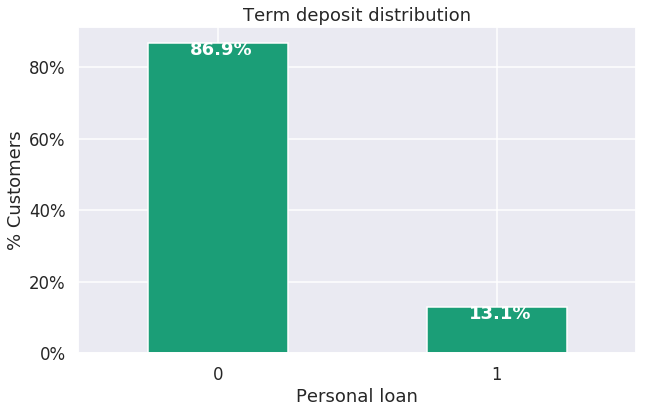

In [57]:
from pylab import rcParams
import matplotlib.ticker as mtick # For specifying the axes tick format 
rcParams['figure.figsize']=10,6

ax = (df['loan'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers with loan')
ax.set_xlabel('Personal loan')
ax.set_ylabel('% Customers')
ax.set_title('Term deposit distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')


In [58]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

for train_set, test_set in stratified.split(term_deposits, term_deposits["loan"]):
    stratified_train = term_deposits.loc[train_set]
    stratified_test = term_deposits.loc[test_set]
    
stratified_train["loan"].value_counts()/len(df)
stratified_test["loan"].value_counts()/len(df)

no     0.130443
yes    0.019620
Name: loan, dtype: float64

In [59]:
# Separate the labels and the features.
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
train_data.shape
test_data.shape
train_data['deposit'].value_counts()

no     4976
yes    4511
Name: deposit, dtype: int64

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
   def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9487 entries, 9069 to 9672
Data columns (total 17 columns):
deposit      9487 non-null object
age          9487 non-null int64
job          9487 non-null object
marital      9487 non-null object
education    9487 non-null object
default      9487 non-null object
balance      9487 non-null int64
housing      9487 non-null object
loan         9487 non-null object
contact      9487 non-null object
day          9487 non-null int64
month        9487 non-null object
duration     9487 non-null int64
campaign     9487 non-null int64
pdays        9487 non-null int64
previous     9487 non-null int64
poutcome     9487 non-null object
dtypes: int64(7), object(10)
memory usage: 1.3+ MB


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign", "pdays", "previous","duration"])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [64]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.18894544, -0.49298851, -1.74096747, ...,  0.        ,
         0.        ,  1.        ],
       [-1.52946453, -0.35244278, -0.08246438, ...,  0.        ,
         1.        ,  0.        ],
       [-0.105163  , -0.49233175, -0.08246438, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.85920499, -0.26936317, -1.03018043, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.48131411, -0.11830935,  1.5760387 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.60785766, -0.34850224,  1.69450321, ...,  1.        ,
         0.        ,  0.        ]])

In [95]:
X_test = preprocess_pipeline.fit_transform(test_data)
X_test

array([[-0.51777412, -0.05174313, -0.414885  , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.33099438,  0.3582224 , -0.65592988, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.01000917, -0.39602627, -1.13801964, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.51927026,  0.97964125, -0.17384013, ...,  0.        ,
         0.        ,  1.        ],
       [-1.02703521, -0.34328502, -1.62010939, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.33099438, -0.28907874,  1.7545189 , ...,  0.        ,
         0.        ,  1.        ]])

In [65]:
y_train = train_data['deposit']
y_test = test_data['deposit']
y_train.shape

(9487,)

In [66]:
encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)
y_train_yes = (y_train == 1)
y_train
y_train_yes

array([False,  True, False, ...,  True, False, False])

In [0]:
some_instance = X_train[1250]

## Predictive model (Classification)

In [0]:
# Time for Classification Models
import time

from sklearn.decomposition import PCA
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=5000),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(gamma = 'auto'),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [0]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train, Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [70]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.43 s
trained Nearest Neighbors in 0.24 s
trained Linear SVM in 4.80 s
trained Gradient Boosting Classifier in 1.76 s
trained Decision Tree in 0.09 s
trained Random Forest in 0.21 s
trained Neural Net in 9.84 s
trained Naive Bayes in 0.02 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.088844
5                 Random Forest     0.996205       0.210425
1             Nearest Neighbors     0.864446       0.235221
3  Gradient Boosting Classifier     0.858543       1.760972
6                    Neural Net     0.852957       9.836662
2                    Linear SVM     0.850954       4.797047
0           Logistic Regression     0.829029       0.429291
7                   Naive Bayes     0.719827       0.020091


## Overfitting

Overfitting takes into consideration the random noise in the fitting process rather than the pattern itself. This occurs when the model gets a good score in the training set but during testing the score drops substantially. 

Expectation is that, the model should take care of the overall pattern of the data in order to correctly classify whether a target customer will suscribe to a term deposit or not. In the examples above, it is most likely that the Decision Tree Classifier and Random Forest classifiers are overfitting since they both give us nearly perfect scores (100% and 99%) accuracy scores. 


The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. If we split it by 3, 2/3 of the data or 66% will be used for training and 1/3 33% will be used or testing and we will do the testing process three times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

In [0]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC(gamma='auto')
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [72]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
4,Grad B CLF,0.843999
6,Neural Classifier,0.843788
7,Naives Bayes,0.843788
1,SVC,0.842101
5,Rand FC,0.836725
0,Logistic Reg.,0.825974
2,KNN,0.807527
3,Dec Tree,0.789605


Let's cross validate the Gradient Boosting Classifier.

In [92]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=5)
from sklearn.metrics import accuracy_score
grad_clf.fit(X_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.85


In [0]:
predicted_probas =grad_clf.predict_proba(X_test)

### Classification Report
The classification report visualizer displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range (0.0, 1.0) to facilitate easy comparison of classification models across different classification reports.

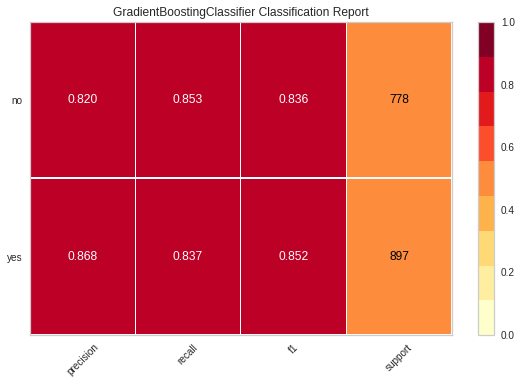

In [96]:
from yellowbrick.classifier import ClassificationReport

# Specify the target classes
classes = ["yes", "no"]

visualizer = ClassificationReport(grad_clf, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Draw/show/poof the data

The classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. Visual classification reports are used to compare classification models to select models that are “redder”, e.g. have stronger classification metrics or that are more balanced.

The metrics are defined in terms of true and false positives, and true and false negatives. Positive and negative in this case are generic names for the classes of a binary classification problem. In the example above, we would consider true and false occupied and true and false unoccupied. Therefore a true positive is when the actual class is positive as is the estimated class. A false positive is when the actual class is negative but the estimated class is positive. Using this terminology the meterics are defined as follows:

#### precision
Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

#### recall
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

#### f1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

#### support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

### Confusion Matrix
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.

Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.

True Negatives (Top-Left Square) correctly classify the "No" class or potenial clients that are not willing to suscribe a term deposit.
False Negatives (Top-Right Square) incorrectly classify the "No" class or potential clients that are not willing to suscribe a term depositt.
False Positives (Bottom-Left Square) incorrectly classify the "Yes" class or potential clients that are willing to suscribe a term deposit.
True Positives (Bottom-Right Square) correctly classify the "Yes" class or potenial clients that are willing to suscribe a term deposit.

In [158]:
y_pred = grad_clf.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       897
           1       0.82      0.85      0.84       778

    accuracy                           0.84      1675
   macro avg       0.84      0.85      0.84      1675
weighted avg       0.85      0.84      0.84      1675



In [159]:
accuracy_score(y_test,y_pred)

0.844776119402985

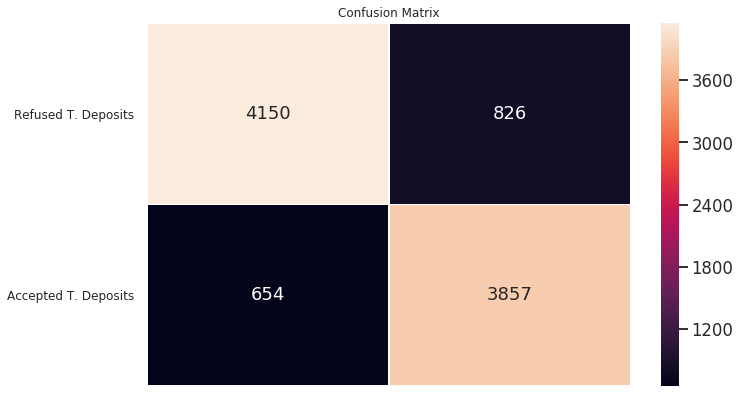

In [74]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=12)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=12, rotation=360)
plt.show()

### Precision and Recall
- Recall is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect. 
- Precision means how sure is the prediction of our model that the actual label is a "Yes".

### Recall Precision Tradeoff
As the precision gets higher the recall gets lower and vice versa. For instance, if we increase the precision from 30% to 60% the model is picking the predictions that the model believes is 60% sure. If there is an instance where the model believes that is 58% likely to be a potential client that will suscribe to a term deposit then the model will classify it as a "No." However, that instance was actually a "Yes" (potential client did suscribe to a term deposit.) That is why the higher the precision the more likely the model is to miss instances that are actually a "Yes"

In [75]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ', precision_score(y_train, y_train_pred))
print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.8236173393124065
Recall Score:  0.8550210596320107


- The model is 77% sure that the potential client will suscribe to a term deposit. 
- The classifier identifies 60% of potential clients that will suscribe to a term deposit.

In [76]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)


0.8390254513813357

In [77]:
y_scores = grad_clf.decision_function([some_instance])
y_scores

array([-2.15567895])

In [79]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=5, method="decision_function")
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
y_scores.shape

(9487,)

#### Visualization of precision, recall, f1 score, and queue rate with respect to the discrimination threshold of a binary classifier

The discrimination threshold is the probability or score at which the positive class is chosen over the negative class. Generally, this is set to 50% but the threshold can be adjusted to increase or decrease the sensitivity to false positives or to other application factors.

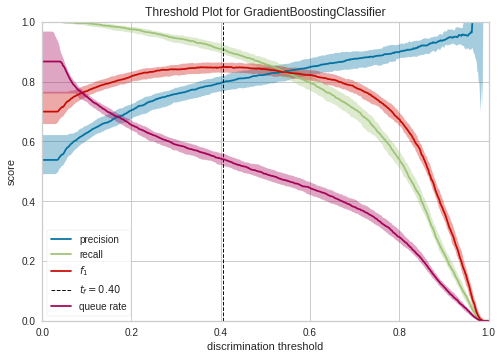

In [88]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(grad_clf)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.poof()           # Draw/show/poof the data

In the figure above, the binary classifier determines if an customerrs will go for term deposit (the positive case) or not (the negative case). If the score or probability is greater than discrimination threshold (0.4) then the positive class is selected, otherwise, the negative class is. Generally speaking, the threshold is balanced between cases and set to 0.5 or 50% probability. However, this threshold may not be the optimal threshold: often there is an inverse relationship between precision and recall with respect to a discrimination threshold. By adjusting the threshold of the classifier, it is possible to tune the F1 score (the harmonic mean of precision and recall) to the best possible fit or to adjust the classifier to behave optimally for the specific application. Classifiers are tuned by considering the following metrics:
- Precision: An increase in precision is a reduction in the number of false positives; this metric should be optimized when the cost of special treatment is high (e.g. wasted time in term deposit market campaign).
- Recall: An increase in recall decrease the likelihood that the positive class is missed; this metric should be optimized when it is vital to catch the case even at the cost of more false positives.
- F1 Score: The F1 score is the harmonic mean between precision and recall. The fbeta parameter determines the relative weight of precision and recall when computing this metric, by default set to 1 or F1. Optimizing this metric produces the best balance between precision and recall.
- Queue Rate: The “queue” is the terms deposit query. This metric describes the percentage of instances that must be reviewed. If review has a high cost for term deposit, then this must be minimized with respect to business requirements; if it doesn’t, this could be optimized to ensure the query box is clean.

In the figure above we see the visualizer tuned to look for the optimal F1 score, which is annotated as a threshold of 0.40. The model is run multiple times over multiple train/test splits in order to account for the variability of the model with respect to the metrics (shown as the fill area around the median curve).

## AUC
First we will predict the probability values from Gradient Boosting model for our dataset.

In [130]:
predict_proba = pd.DataFrame(grad_clf.predict_proba(X_test))
predict_proba.head()

,0,1
0,0.139467,0.860533
1,0.207494,0.792506
2,0.889524,0.110476
3,0.927987,0.072013
4,0.781166,0.218834


### ROC Curve (Receiver Operating Characteristic) AUC (Area Under the Curve)
ROCAUC plot allows to visualize the tradeoff between the classifier’s sensitivity and specificity.

The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. The ideal point is therefore the top-left corner of the plot: FP are zero and TP are one.

This leads to another metric, area under the curve (AUC), which is a computation of the relationship between FP and TP. The higher the AUC, the better the model generally is. However, it is also important to inspect the “steepness” of the curve, as this describes the maximization of the TP rate while minimizing the FP rate.

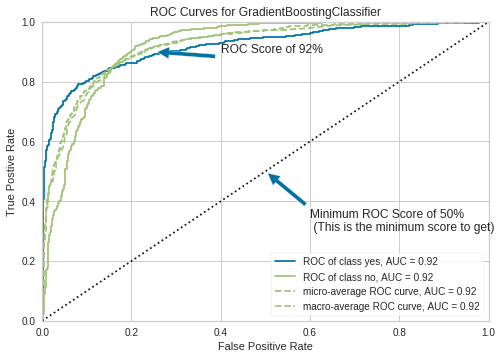

In [103]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(grad_clf, classes=["yes", "no"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)# Evaluate the model on the test data
plt.annotate('ROC Score of 92% \n', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(shrink=0.05),
            )
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(shrink=0.05),
                )
visualizer.poof()                       # Draw/show/poof the data

As we can notice, the minimum difference between the False Positive and True Positive is when our sensitivity value is at 0.6. Now we will calculate the new cut off value based on this value of sensitivity and see how the accuracy of our model increases.

In [163]:
cutoff_prob = threshold[(np.abs(recalls - 0.6)).argmin()]
round( float( cutoff_prob ), 2 )

1.2

The ideal cutoff for having the maximum sensitivity (True Positive Rate) and 1-specificity (False Positive Rate) comes out to be 0.6 


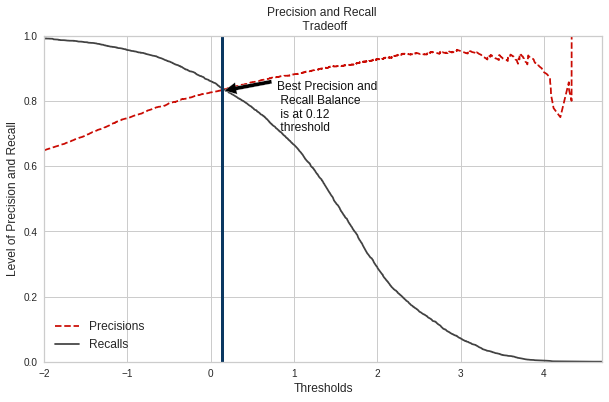

In [164]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve
precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=12)
    plt.ylabel("Level of Precision and Recall", fontsize=12)
    plt.xlabel("Thresholds", fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.12 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

## Precision-Recall Curves
Precision-Recall curves metric used to evaluate a classifier’s quality. The precision-recall curve shows the tradeoff between precision, a measure of result relevancy, and recall, a measure of how many relevant results are returned. A large area under the curve represents both high recall and precision, the best case scenario for a classifier, showing a model that returns accurate results for the majority of classes it selects.

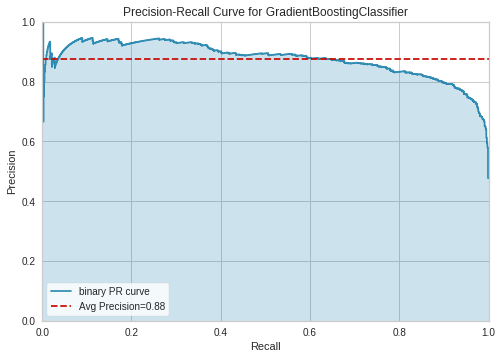

In [104]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(GradientBoostingClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

The base case for precision-recall curves is the binary classification case, and this case is also the most visually interpretable. In the figure above we can see the precision plotted on the y-axis against the recall on the x-axis. The larger the filled in area, the stronger the classifier is. The red line annotates the average precision, a summary of the entire plot computed as the weighted average of precision achieved at each threshold such that the weight is the difference in recall from the previous threshold.

### Learning Curve
Learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used two show two things:

- How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).

- If the estimator is more sensitive to error due to variance vs. error due to bias.

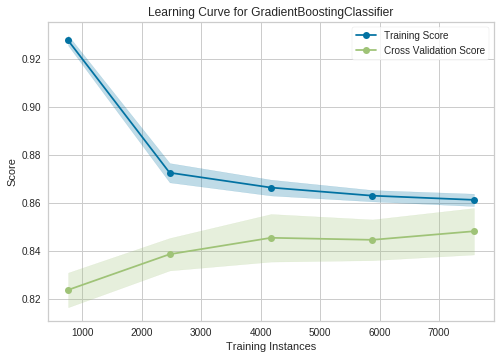

In [107]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    grad_clf, scoring='f1_weighted', cv=5)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.poof()           # Draw/show/poof the data

The training and cross-validation scores converge together as more data is added, therefore the model may not benefit from more data. 

The curves are plotted with the mean scores, however variability during cross-validation is shown with the shaded areas that represent a standard deviation above and below the mean for all cross-validations. If the model suffers from error due to bias, then there will likely be more variability around the training score curve. If the model suffers from error due to variance, then there will be more variability around the cross validated score.



In [146]:
pip install scikit-plot 

Lift/cumulative gains charts aren't a good way to evaluate a model (as it cannot be used for comparison between models), and are instead a means of evaluating the results where our resources are finite. There's a cost to action each result in  marketing campaign and only action those that are on the fence. Where our model is very good, and has high classification accuracy for all results, you won't get much lift from ordering our results by confidence.

In [0]:
import sklearn.metrics
import pandas as pd

def calc_cumulative_gains(df: pd.DataFrame, actual_col: str, predicted_col:str, probability_col:str):

In [0]:
df.sort_values(by=probability_col, ascending=False, inplace=True)

subset = df[df[predicted_col] == True]

rows = []
for group in np.array_split(subset, 10):
    score = sklearn.metrics.accuracy_score(group[actual_col].tolist(),
                                               group[predicted_col].tolist(),
                                               normalize=False)

    rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

lift = pd.DataFrame(rows)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


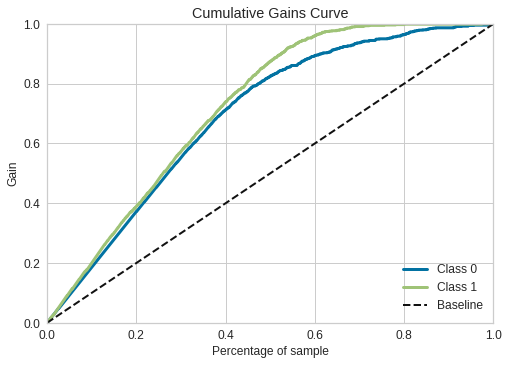

In [154]:
from scikitplot.metrics import plot_lift_curve
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


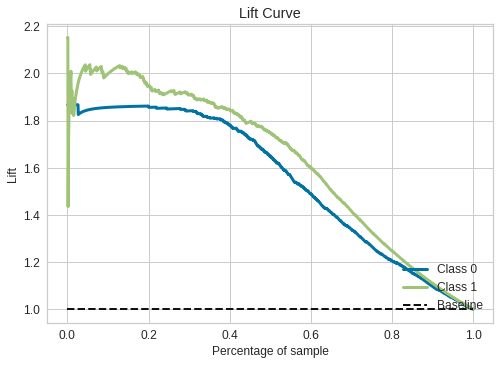

In [155]:
skplt.metrics.plot_lift_curve(y_test, predicted_probas, title='Lift Curve', ax=None, ﬁgsize=None, title_fontsize='large', text_fontsize='medium') 